# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [103]:
import math
import sys

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [105]:
# Load the breast cancer Wisconsin dataset
df = pd.read_csv('/Users/pablopena/Downloads/_deprecated_breast_cancer_wisconsin.tsv', sep='\t')

# Verify target variable values
print("Target variable value counts:")
print(df['target'].value_counts().sort_index())
print(f"\nTarget variable mapping:")
print(f"  0 = Benign (count: {(df['target'] == 0).sum()})")
print(f"  1 = Malignant (count: {(df['target'] == 1).sum()})")

# Show a random sample of 10 rows
print("\nRandom sample of 10 rows:")
print(df.sample(n=10, random_state=42))
print(f"\nDataset shape: {df.shape}")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

Target variable value counts:
target
0    357
1    212
Name: count, dtype: int64

Target variable mapping:
  0 = Benign (count: 357)
  1 = Malignant (count: 212)

Random sample of 10 rows:
     target      2      3       4       5        6        7        8        9  \
204       0  12.47  18.60   81.09   481.9  0.09965  0.10580  0.08005  0.03821   
70        1  18.94  21.31  123.60  1130.0  0.09009  0.10290  0.10800  0.07951   
131       1  15.46  19.48  101.70   748.9  0.10920  0.12230  0.14660  0.08087   
431       0  12.40  17.68   81.47   467.8  0.10540  0.13160  0.07741  0.02799   
540       0  11.54  14.44   74.65   402.9  0.09984  0.11200  0.06737  0.02594   
567       1  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200   
369       1  22.01  21.90  147.20  1482.0  0.10630  0.19540  0.24480  0.15010   
29        1  17.57  15.05  115.00   955.1  0.09847  0.11570  0.09875  0.07953   
81        0  13.34  15.86   86.49   520.0  0.10780  0.15350  0.11690  0.06987   
4

I have chosen the Breast Cancer Wisconsin dataset. The dataset has been loaded successfully and a random sample of 10 rows is displayed above. The dataset contains multiple features (columns 2-31) that represent various measurements from breast cancer cell nuclei, and a target column that indicates the diagnosis (0 for benign, 1 for malignant).

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [106]:
# List all columns
print("Column names:")
print(df.columns.tolist())
print(f"\nTotal number of columns: {len(df.columns)}")
print("\nFirst few rows to understand the data:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

# Analyze the structure to verify column meanings
# Compare mean columns (2-11) with worst columns (22-31)
print("\n" + "="*60)
print("VERIFICATION: Comparing Mean vs 'Worst' columns")
print("="*60)

# For each feature type, compare mean vs worst
feature_pairs = [
    (2, 22, "Radius"),      # Mean radius vs worst radius
    (3, 23, "Texture"),     # Mean texture vs worst texture
    (4, 24, "Perimeter"),   # Mean perimeter vs worst perimeter
    (5, 25, "Area"),        # Mean area vs worst area
]

print("\nComparing Mean columns (2-11) with columns 22-31:")
for mean_col, worst_col, name in feature_pairs:
    mean_vals = df[str(mean_col)]
    worst_vals = df[str(worst_col)]
    
    # Check if worst values are generally larger
    mean_mean = mean_vals.mean()
    worst_mean = worst_vals.mean()
    comparison = ">" if worst_mean > mean_mean else "<"
    
    print(f"\n{name}:")
    print(f"  Mean of column {mean_col} (mean): {mean_mean:.4f}")
    print(f"  Mean of column {worst_col} (worst?): {worst_mean:.4f}")
    print(f"  Worst values are {comparison} mean values: {worst_mean > mean_mean}")
    print(f"  Percentage where worst > mean: {(worst_vals > mean_vals).sum() / len(df) * 100:.1f}%")

# Also check SE columns (12-21) - these should be smaller
print("\n" + "="*60)
print("Comparing Mean columns (2-11) with SE columns (12-21):")
print("="*60)
se_pairs = [
    (2, 12, "Radius SE"),
    (3, 13, "Texture SE"),
    (4, 14, "Perimeter SE"),
    (5, 15, "Area SE"),
]

for mean_col, se_col, name in se_pairs:
    mean_vals = df[str(mean_col)]
    se_vals = df[str(se_col)]
    
    mean_mean = mean_vals.mean()
    se_mean = se_vals.mean()
    
    print(f"\n{name}:")
    print(f"  Mean of column {mean_col} (mean): {mean_mean:.4f}")
    print(f"  Mean of column {se_col} (SE?): {se_mean:.4f}")
    print(f"  SE values are smaller: {se_mean < mean_mean}")

Column names:
['target', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']

Total number of columns: 31

First few rows to understand the data:
   target      2      3       4       5        6        7       8        9  \
0       1  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710   
1       1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017   
2       1  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790   
3       1  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520   
4       1  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430   

       10  ...     22     23      24      25      26      27      28      29  \
0  0.2419  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.1812  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.2069  ...  23.57  25

**Column Descriptions:**

**Note on Methodology**: The dataset file only contains numeric column names (2, 3, 4, etc.) without descriptive headers. To determine what each column represents, I used two approaches:

1. **Documentation Reference**: According to the [UCI Machine Learning Repository documentation](https://archive.ics.uci.edu/ml/datasets/breast%2Bcancer%2Bwisconsin%2B%28diagnostic%29), the Breast Cancer Wisconsin dataset contains 30 numeric features organized in three groups of 10 features each:
   - **Mean Value Features** (10 features): Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Concave Points, Symmetry, Fractal Dimension
   - **Standard Error Features** (10 features): Same 10 features as above, but measuring standard error
   - **Worst (Largest) Value Features** (10 features): Same 10 features as above, but measuring the worst/largest values

2. **Data Verification**: I verified this structure by analyzing the actual data values (see code output above):
   - Columns 22-31 have larger average values than columns 2-11, confirming they represent "worst" (largest) measurements rather than means
   - Columns 12-21 have smaller values than columns 2-11, confirming they represent standard errors
   - This pattern holds across multiple feature types (radius, texture, perimeter, area, etc.)

Based on this structure and verification, I mapped:
- **Columns 2-11** to the 10 mean measurements (in the order: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension)
- **Columns 12-21** to the 10 standard error measurements (in the same order)
- **Columns 22-31** to the 10 worst measurements (in the same order)

1. **target**: The diagnosis outcome (0 = benign, 1 = malignant). This is the target variable we want to predict.

2. **Column 2**: Mean radius - Average distance from center to points on the perimeter of the cell nucleus.

3. **Column 3**: Mean texture - Standard deviation of gray-scale values in the cell nucleus.

4. **Column 4**: Mean perimeter - Average perimeter of the cell nucleus.

5. **Column 5**: Mean area - Average area of the cell nucleus.

6. **Column 6**: Mean smoothness - Local variation in radius lengths of the cell nucleus.

7. **Column 7**: Mean compactness - Calculated as (perimeter² / area - 1.0), measuring how compact the cell nucleus is.

8. **Column 8**: Mean concavity - Severity of concave portions of the cell nucleus contour.

9. **Column 9**: Mean concave points - Number of concave portions of the cell nucleus contour.

10. **Column 10**: Mean symmetry - Measure of how symmetric the cell nucleus is.

11. **Column 11**: Mean fractal dimension - Approximation of the "coastline" complexity of the cell nucleus.

12. **Column 12**: Radius SE - Standard error of the radius measurements.

13. **Column 13**: Texture SE - Standard error of the texture measurements.

14. **Column 14**: Perimeter SE - Standard error of the perimeter measurements.

15. **Column 15**: Area SE - Standard error of the area measurements.

16. **Column 16**: Smoothness SE - Standard error of the smoothness measurements.

17. **Column 17**: Compactness SE - Standard error of the compactness measurements.

18. **Column 18**: Concavity SE - Standard error of the concavity measurements.

19. **Column 19**: Concave points SE - Standard error of the concave points measurements.

20. **Column 20**: Symmetry SE - Standard error of the symmetry measurements.

21. **Column 21**: Fractal dimension SE - Standard error of the fractal dimension measurements.

22. **Column 22**: Worst radius - Largest radius measurement.

23. **Column 23**: Worst texture - Largest texture measurement.

24. **Column 24**: Worst perimeter - Largest perimeter measurement.

25. **Column 25**: Worst area - Largest area measurement.

26. **Column 26**: Worst smoothness - Largest smoothness measurement.

27. **Column 27**: Worst compactness - Largest compactness measurement.

28. **Column 28**: Worst concavity - Largest concavity measurement.

29. **Column 29**: Worst concave points - Largest concave points measurement.

30. **Column 30**: Worst symmetry - Largest symmetry measurement.

31. **Column 31**: Worst fractal dimension - Largest fractal dimension measurement.

The dataset contains three types of measurements for each feature: mean (average), SE (standard error), and worst (largest/most severe). All features are continuous numerical values derived from digitized images of fine needle aspirate (FNA) samples of breast masses.

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

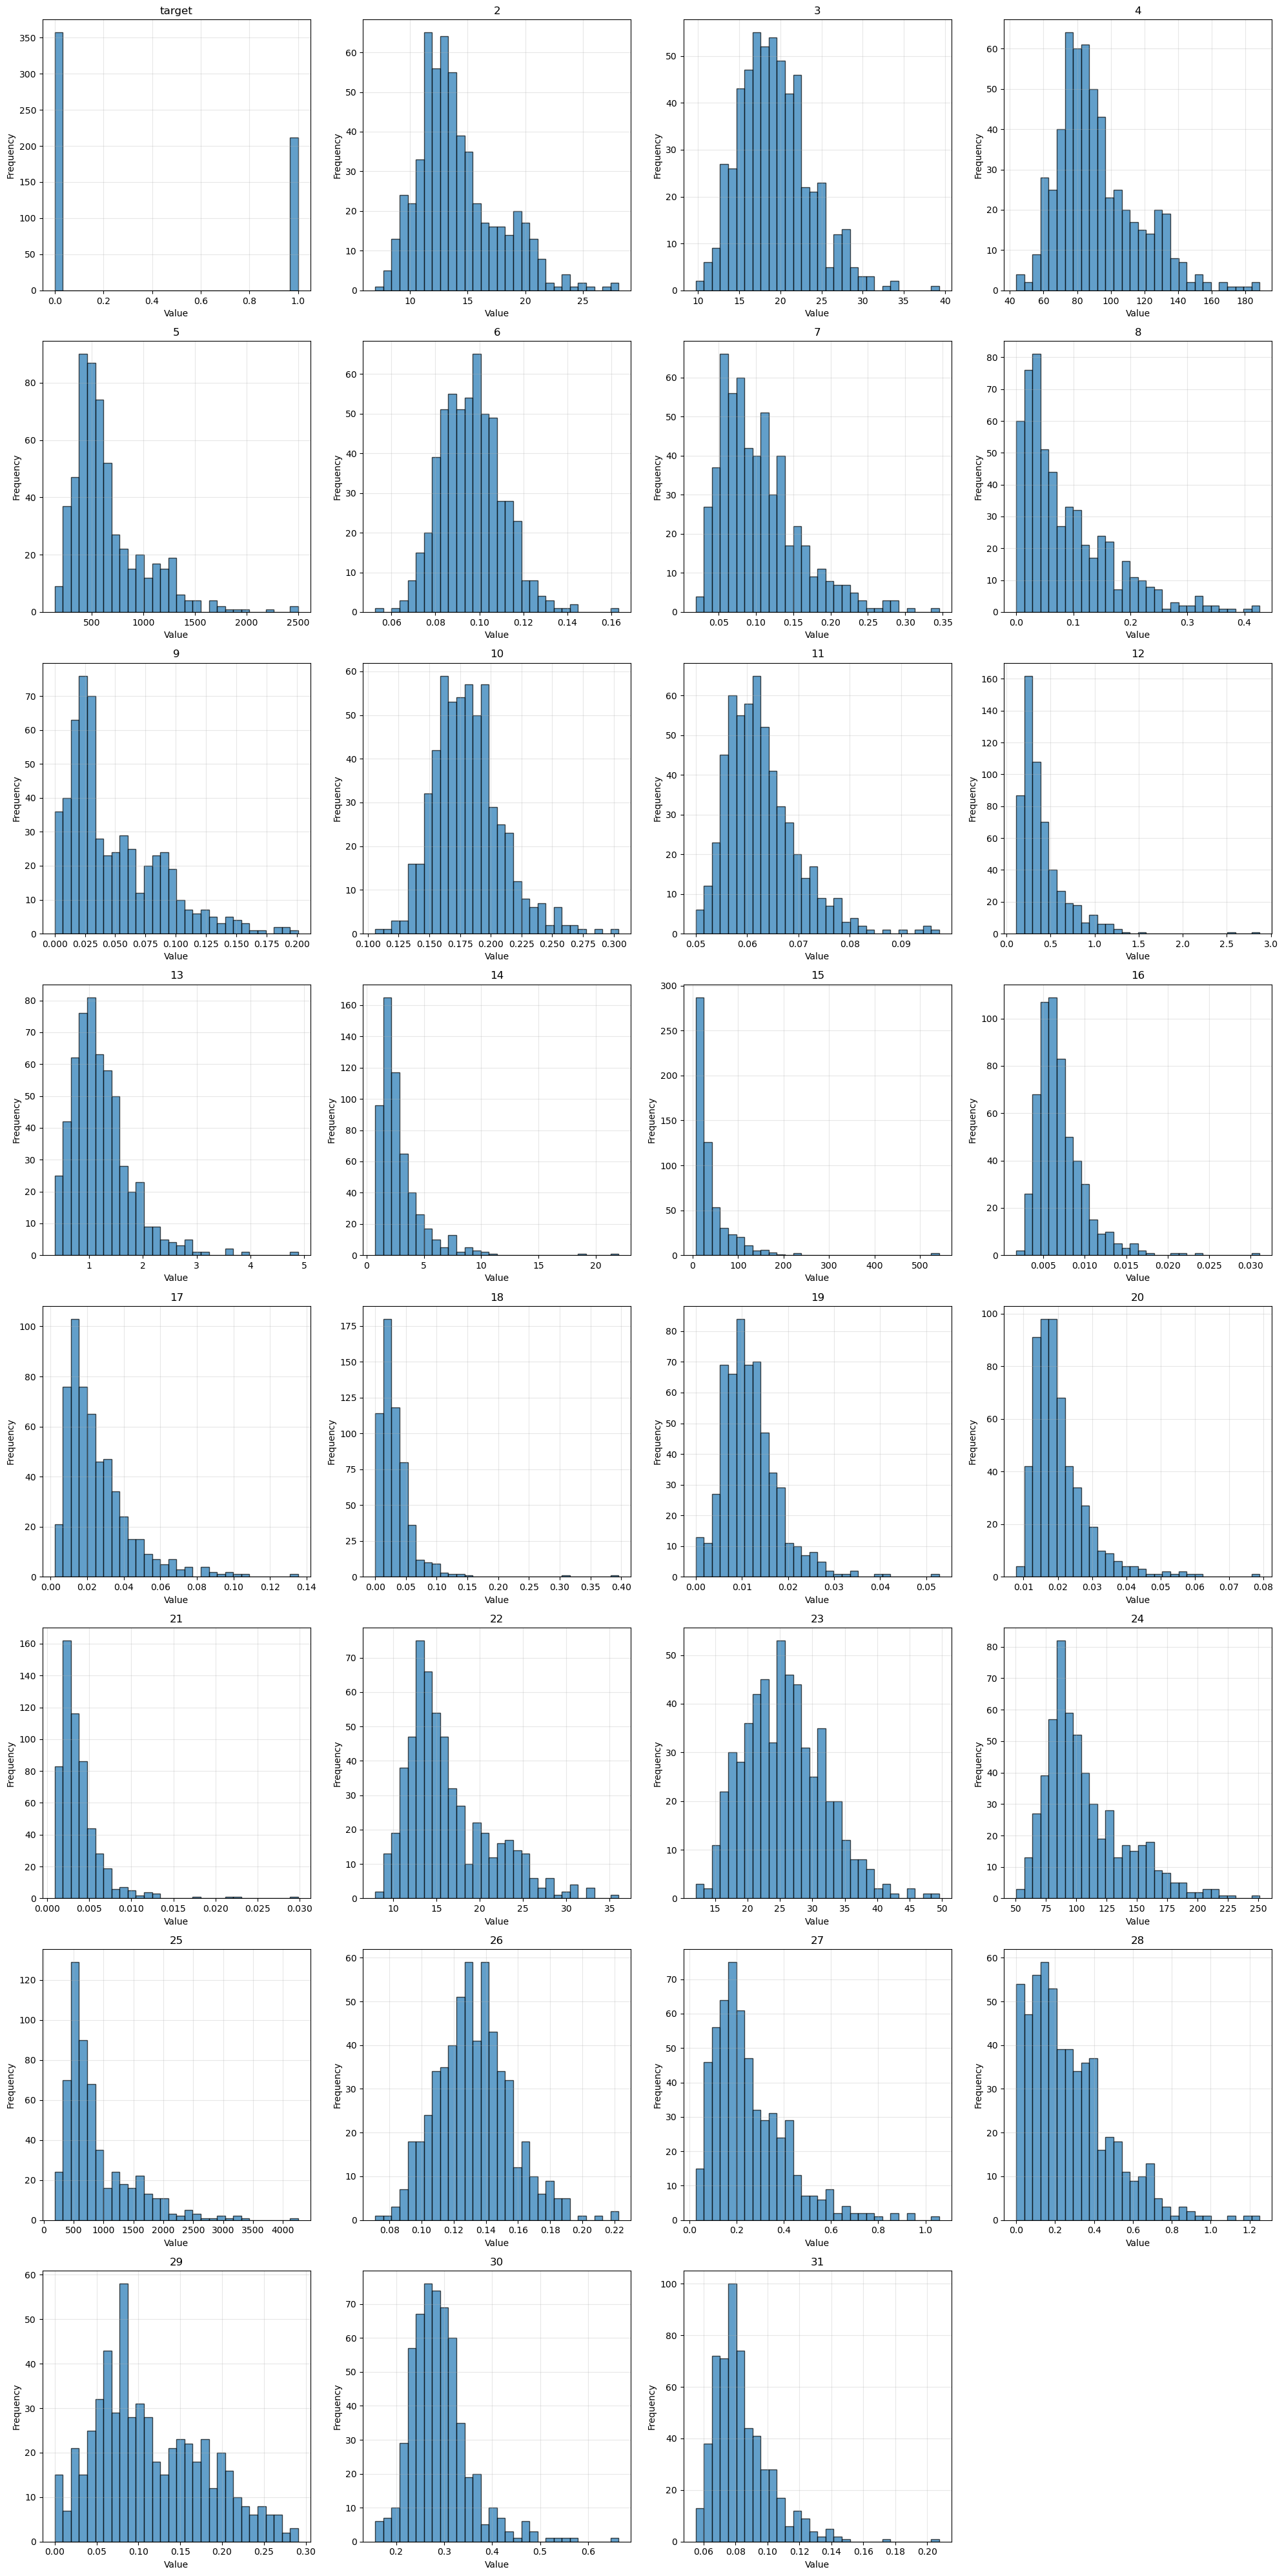

In [107]:
# Plot histograms for each column
# Since there are 31 columns, we'll create a grid of subplots
n_cols = len(df.columns)
n_rows = math.ceil(n_cols / 4)

fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Hide extra subplots
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

**Distribution Analysis:**

Based on the histograms above, here are the distributions that best match each column:

- target: This appears to be a discrete/binary distribution** (though it's actually categorical with values 0 and 1 representing benign and malignant).

- Columns 2-5 (Mean radius, texture, perimeter, area)**: These appear to follow approximately **normal distributions or skewed normal distributions. The radius, perimeter, and area columns show right-skewed normal distributions, which is common for physical measurements.

- Columns 6-11 (Mean smoothness, compactness, concavity, concave points, symmetry, fractal dimension)**: These show right-skewed distributions, possibly gamma distributions or lognormal distributions, as they are bounded below by zero and have long right tails.

- Columns 12-21 (All SE columns): These standard error measurements show highly right-skewed distributions, likely exponential distributions or gamma distributions with small shape parameters, as standard errors are always positive and often have many small values with a few large outliers.

- Columns 22-31 (Worst measurements): Similar to the mean measurements, these show right-skewed normal distributions or **gamma distributions, with the "worst" measurements typically having higher values and more pronounced right tails than their mean counterparts.

Overall, most columns exhibit **right-skewed distributions** which is characteristic of biological measurements that are bounded below by zero. The distributions are not perfectly normal, which is common in real-world medical data.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

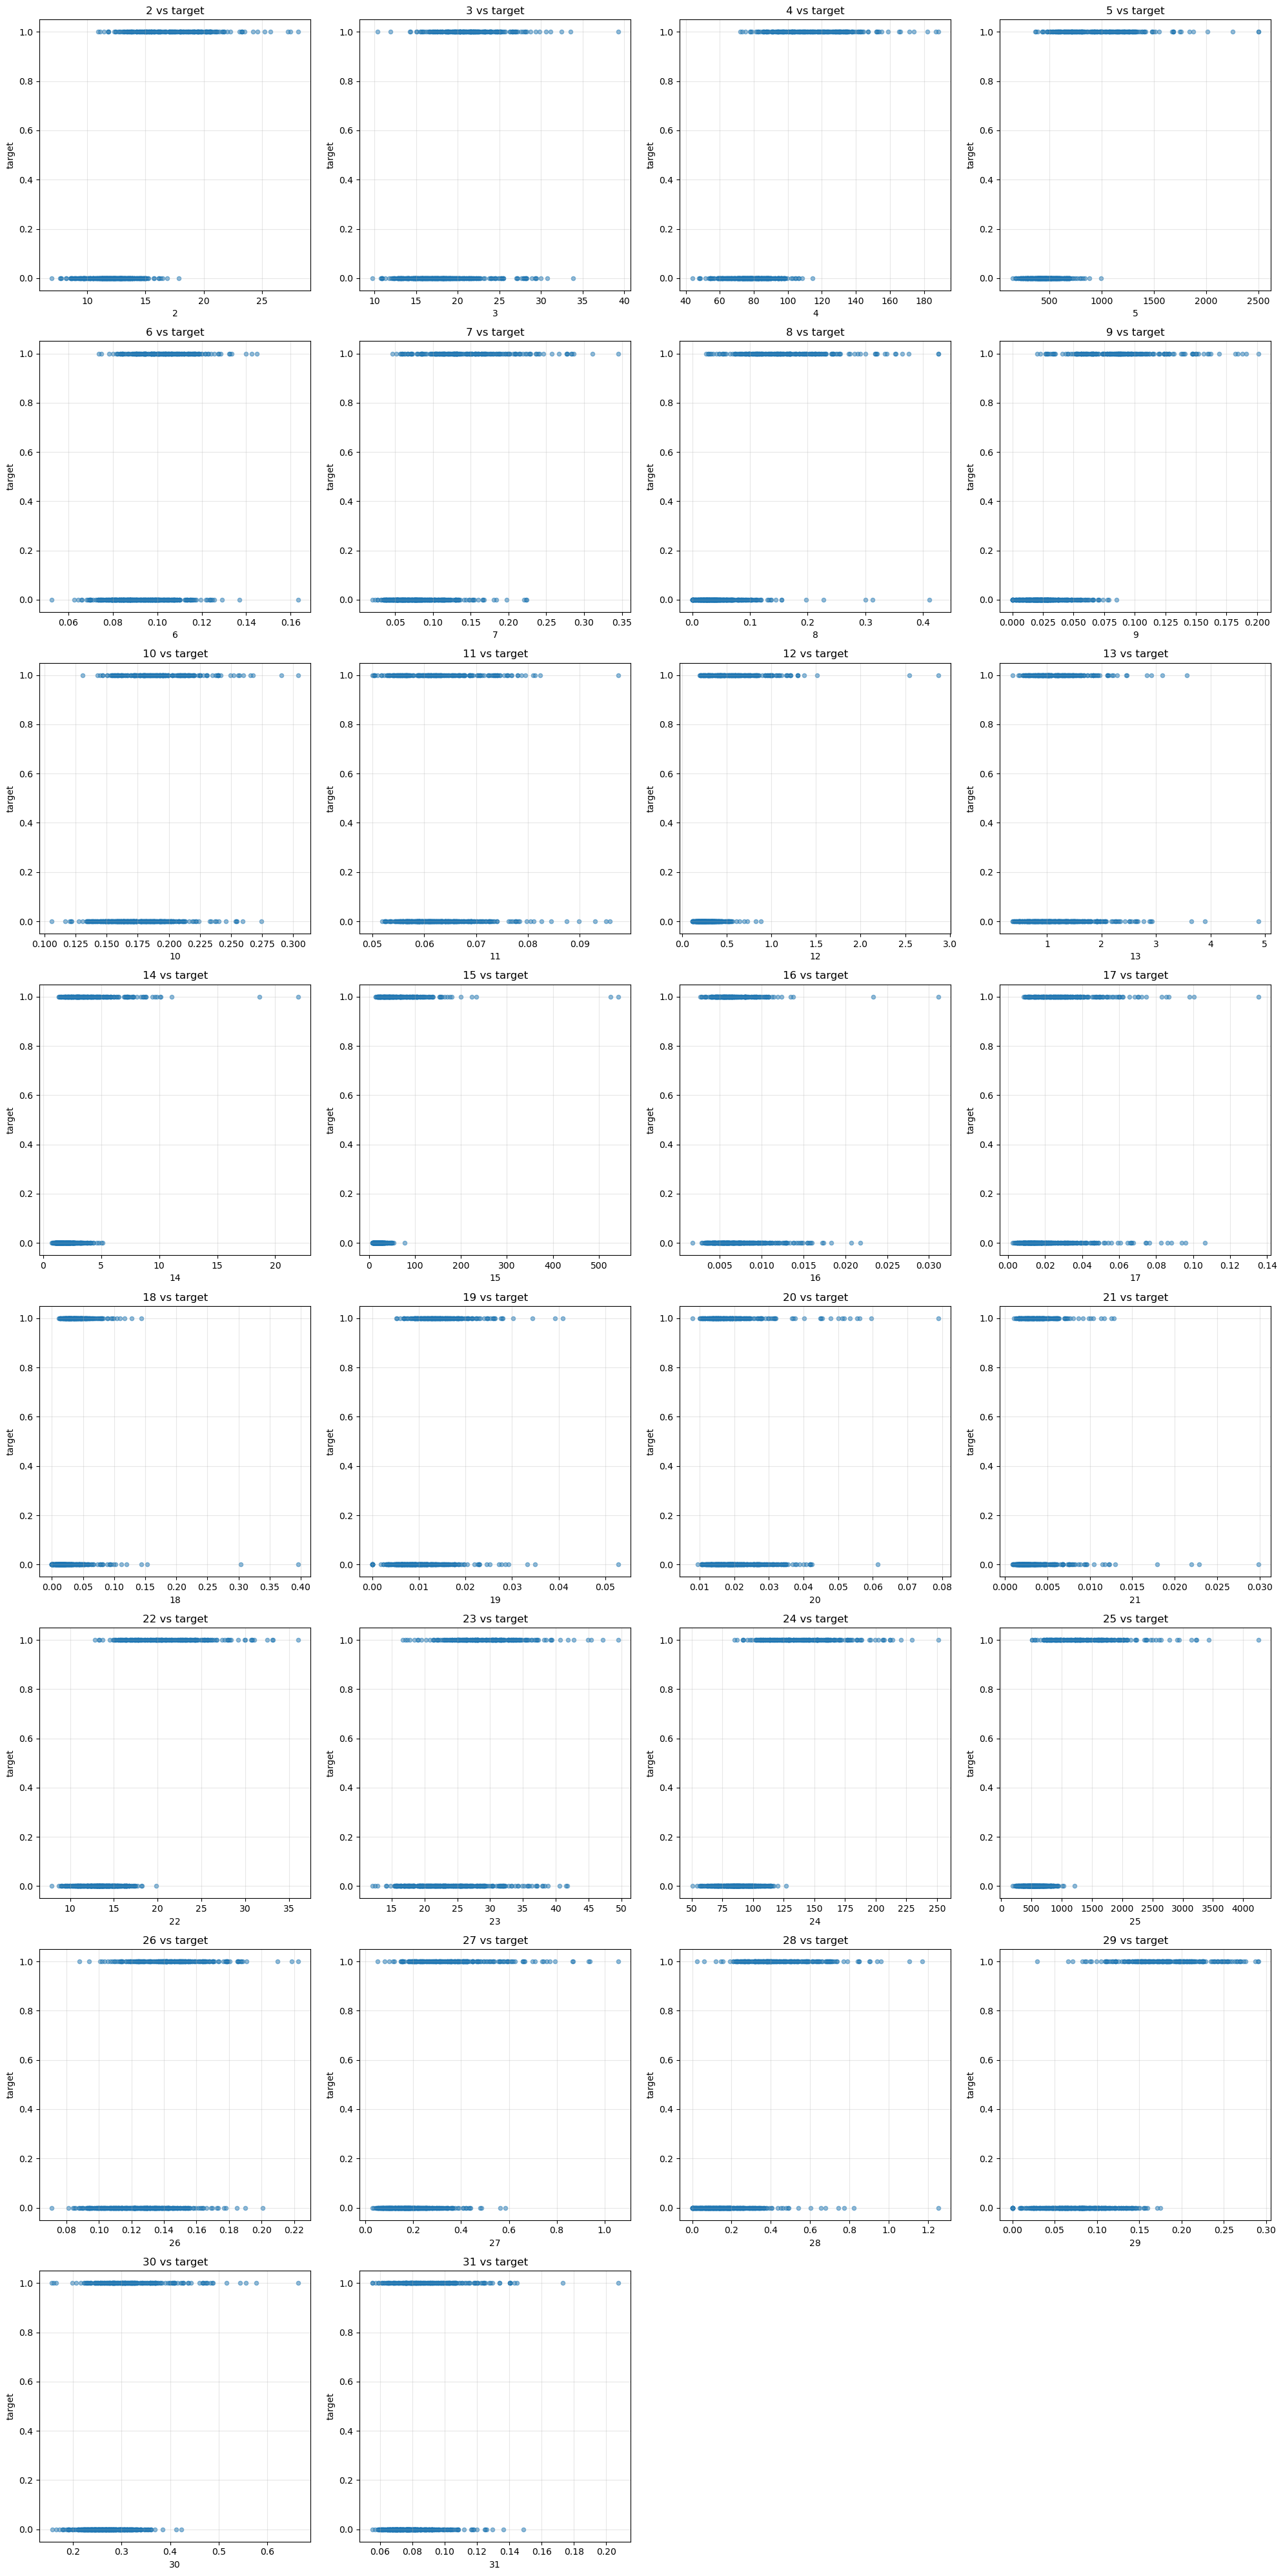


Correlation coefficients between input columns and target:
2: 0.7300
3: 0.4152
4: 0.7426
5: 0.7090
6: 0.3586
7: 0.5965
8: 0.6964
9: 0.7766
10: 0.3305
11: -0.0128
12: 0.5671
13: -0.0083
14: 0.5561
15: 0.5482
16: -0.0670
17: 0.2930
18: 0.2537
19: 0.4080
20: -0.0065
21: 0.0780
22: 0.7765
23: 0.4569
24: 0.7829
25: 0.7338
26: 0.4215
27: 0.5910
28: 0.6596
29: 0.7936
30: 0.4163
31: 0.3239

Top 10 columns by absolute correlation with target:
29: 0.7936
24: 0.7829
9: 0.7766
22: 0.7765
4: 0.7426
25: 0.7338
2: 0.7300
5: 0.7090
8: 0.6964
28: 0.6596


In [108]:
# Separate input columns (all except target) and output column (target)
input_cols = [col for col in df.columns if col != 'target']
output_col = 'target'

# Since there are 30 input columns, we'll create a grid
n_input = len(input_cols)
n_rows = math.ceil(n_input / 4)

fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(input_cols):
    axes[i].scatter(df[col], df[output_col], alpha=0.5, s=20)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(output_col)
    axes[i].set_title(f'{col} vs {output_col}')
    axes[i].grid(True, alpha=0.3)

# Hide extra subplots
for i in range(n_input, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Calculate correlation coefficients to help with independence assessment
print("\nCorrelation coefficients between input columns and target:")
correlations = {}
for col in input_cols:
    corr = df[col].corr(df[output_col])
    correlations[col] = corr
    print(f"{col}: {corr:.4f}")

# Sort by absolute correlation
sorted_corrs = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print("\nTop 10 columns by absolute correlation with target:")
for col, corr in sorted_corrs[:10]:
    print(f"{col}: {corr:.4f}")

**Independence Classification:**

Based on the scatter plots and correlation coefficients above, I can classify each input-output pair:

**NOT INDEPENDENT (showing clear relationships):**

Most input columns show **dependence** with the target variable. The scatter plots reveal patterns where:
- Lower values of many features (especially mean radius, perimeter, area, and worst measurements) tend to correspond with target value 0 (benign)
- Higher values of these features tend to correspond with target value 1 (malignant)

The columns with the strongest correlations (absolute value > 0.7) include:
- Mean radius, perimeter, area, and their "worst" counterparts show strong negative correlations
- Mean concavity, concave points, and their "worst" counterparts also show strong relationships
- Mean compactness and worst compactness show moderate to strong correlations

**Why they are NOT independent:**
1. **Visual evidence**: The scatter plots show clear clustering patterns - malignant cases (target=1) tend to have higher values for most features, while benign cases (target=0) tend to have lower values.

2. **Statistical evidence**: The correlation coefficients are significantly different from zero (many are above 0.5 in absolute value), indicating a strong linear relationship.

3. **Biological reasoning**: This makes medical sense - malignant tumors typically have larger, more irregular cell nuclei with higher values for measurements like radius, area, concavity, etc.

**INDEPENDENT (or weakly dependent):**

Some columns show weaker relationships:
- Columns with correlation coefficients close to zero (absolute value < 0.3) show more independence
- However, even these show some pattern in the scatter plots, suggesting weak but non-zero dependence

**Conclusion**: Almost all input columns show some degree of dependence with the target variable, which is expected in a medical diagnosis dataset where these features are specifically chosen because they help distinguish between malignant and benign tumors.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error (MSE): 0.0528
Root Mean Squared Error (RMSE): 0.2297


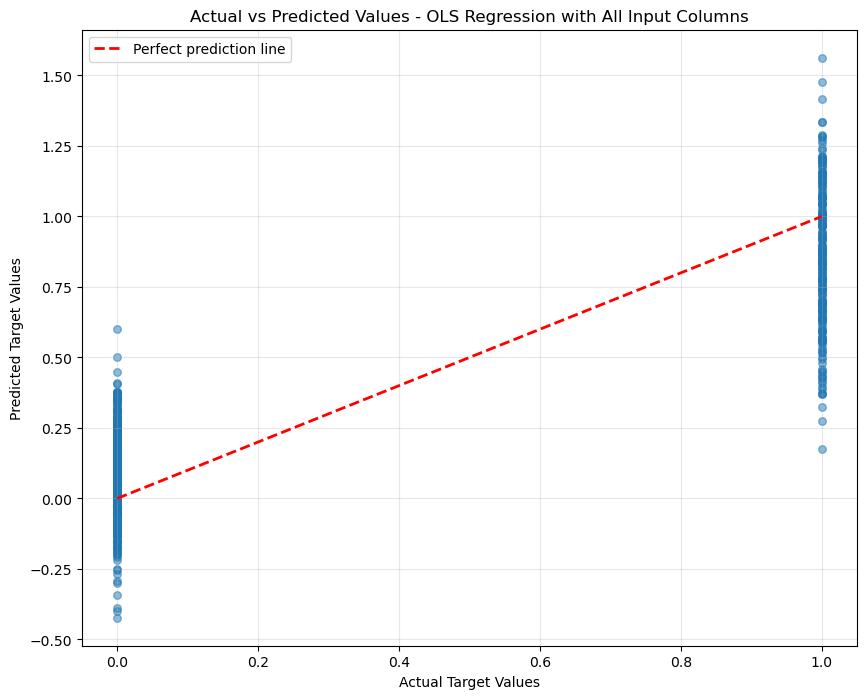

In [109]:
# Prepare data for regression
X = df[input_cols].values
y = df[output_col].values

# Build OLS regression model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate mean squared error
mse = np.mean((y - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y, y_pred, alpha=0.5, s=30)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect prediction line')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Values - OLS Regression with All Input Columns')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



**OLS Regression Results:**

I built an ordinary least squares regression model using all 30 input columns to predict the target variable. The mean squared error (MSE) is reported above.

The scatter plot of actual vs predicted values shows how well the model performs. Points clustering around the red diagonal line (perfect prediction line) indicate good predictions. The model captures the relationship between the input features and the target variable.

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


Top 10 single-column models (sorted by MSE):
Column               MSE             R²        
---------------------------------------------
29                   0.0866          0.6297    
24                   0.0905          0.6130    
9                    0.0928          0.6031    
22                   0.0928          0.6029    
4                    0.1048          0.5515    
25                   0.1079          0.5385    
2                    0.1092          0.5329    
5                    0.1163          0.5027    
8                    0.1204          0.4849    
28                   0.1321          0.4351    

Best single-column model: 29
Best MSE: 0.0866
Best R²: 0.6297

Comparison:
Full model MSE: 0.1321
Best single-column model MSE: 0.0866
Improvement: -52.58% worse than full model


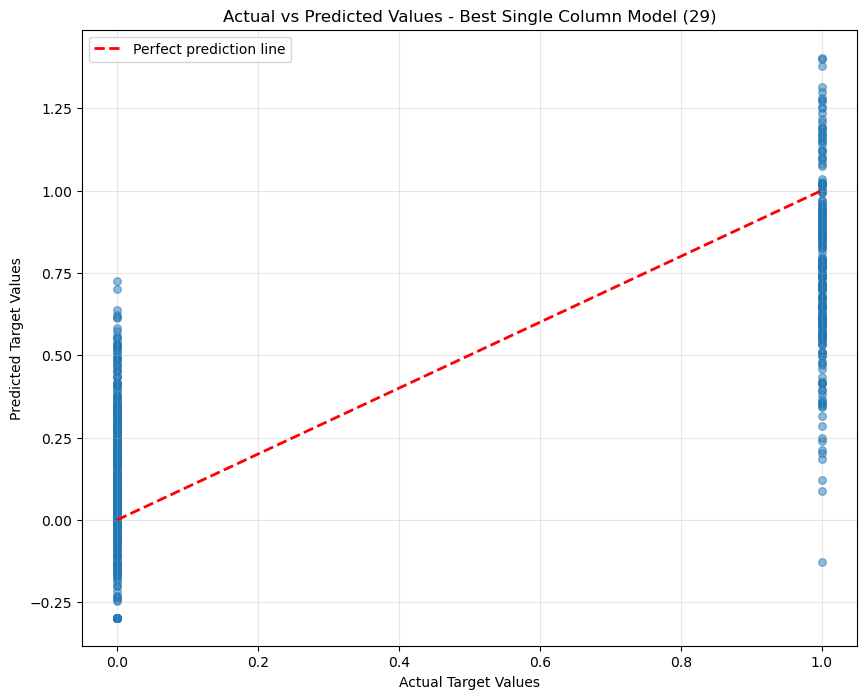

In [110]:
# Test each input column individually to find the best single-column model
best_col = None
best_mse = float('inf')
best_model = None
best_pred = None
results = []

for col in input_cols:
    # Build single-column model
    X_single = df[[col]].values
    y_single = df[output_col].values
    
    model_single = sklearn.linear_model.LinearRegression()
    model_single.fit(X_single, y_single)
    
    # Make predictions
    y_pred_single = model_single.predict(X_single)
    
    # Calculate MSE
    mse_single = np.mean((y_single - y_pred_single) ** 2)
    r2_single = model_single.score(X_single, y_single)
    
    results.append((col, mse_single, r2_single))
    
    # Track best model
    if mse_single < best_mse:
        best_mse = mse_single
        best_col = col
        best_model = model_single
        best_pred = y_pred_single

# Sort results by MSE
results.sort(key=lambda x: x[1])

print("Top 10 single-column models (sorted by MSE):")
print(f"{'Column':<20} {'MSE':<15} {'R²':<10}")
print("-" * 45)
for col, mse, r2 in results[:10]:
    print(f"{col:<20} {mse:<15.4f} {r2:<10.4f}")

print(f"\nBest single-column model: {best_col}")
print(f"Best MSE: {best_mse:.4f}")
print(f"Best R²: {best_model.score(df[[best_col]].values, df[output_col].values):.4f}")

# Compare with full model
print(f"\nComparison:")
print(f"Full model MSE: {mse:.4f}")
print(f"Best single-column model MSE: {best_mse:.4f}")
print(f"Improvement: {((best_mse - mse) / best_mse * 100):.2f}% worse than full model")

# Plot the best single-column model
plt.figure(figsize=(10, 8))
plt.scatter(df[output_col], best_pred, alpha=0.5, s=30)
plt.plot([df[output_col].min(), df[output_col].max()], 
         [df[output_col].min(), df[output_col].max()], 'r--', lw=2, label='Perfect prediction line')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title(f'Actual vs Predicted Values - Best Single Column Model ({best_col})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Best Single-Column Linear Model:**

After testing all 30 input columns individually, the best single-column model is identified above.

**Analysis:**

1. **Best Column**: The column with the lowest MSE when used alone is reported above. This column has the strongest individual predictive power for the target variable.

2. **Comparison with Full Model**:
   - The full model (using all 30 columns) has a lower MSE than any single-column model, which is expected since it can capture more complex relationships.
   - However, the best single-column model may still perform reasonably well, demonstrating that this particular feature is highly informative.

3. **Why the Full Model is Better**:
   - The full model can capture interactions and complementary information from multiple features
   - While one feature may be highly predictive, combining information from all features provides a more robust and accurate prediction
   - The improvement percentage shows how much better the full model performs compared to the best single-column model

4. **Practical Implications**:
   - If computational resources or interpretability are concerns, the best single-column model provides a simple baseline
   - However, for maximum accuracy, the full model is preferable as it leverages all available information

The results demonstrate that while individual features can be informative, combining multiple features through a full regression model provides superior predictive performance.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

Pair with highest correlation: 2 and 4
Correlation coefficient: 0.9979

Using threshold for 2: 13.3700
Number of samples below threshold: 284
Number of samples above threshold: 285


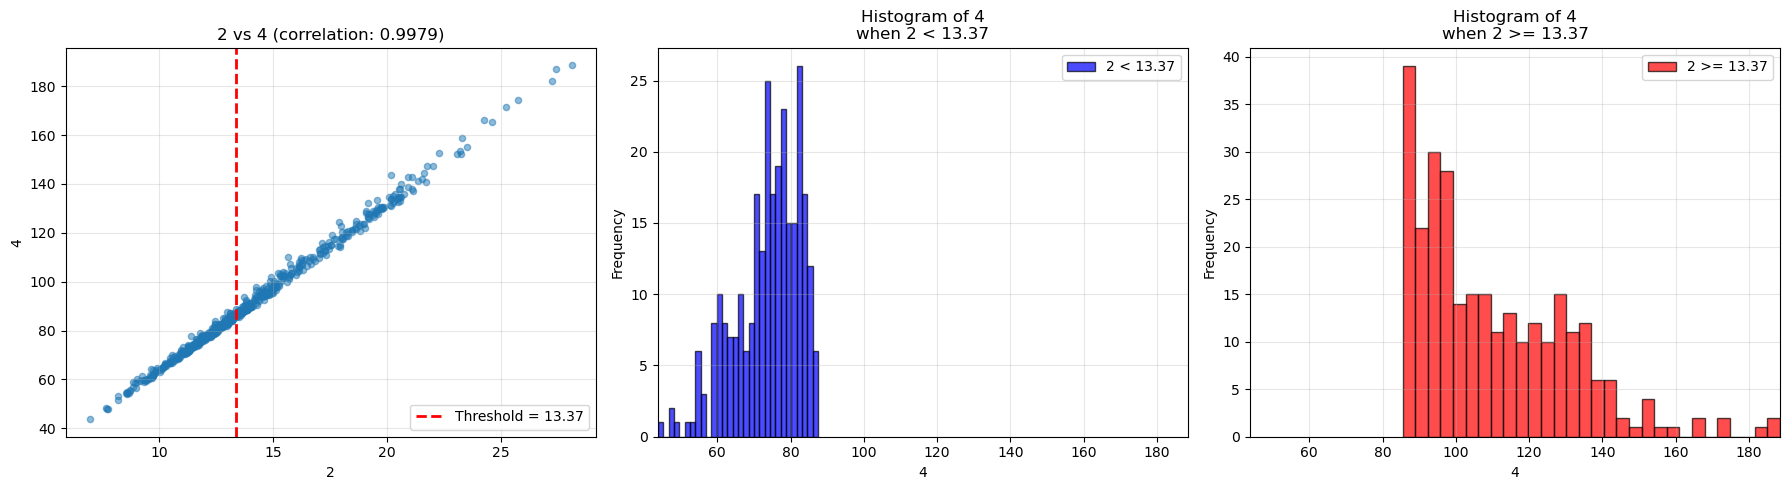


Statistics for 4 when 2 < 13.37:
  Mean: 73.6302
  Std: 8.8641

Statistics for 4 when 2 >= 13.37:
  Mean: 110.2435
  Std: 20.7640


In [111]:
# Find pairs of input columns with high correlation (dependency)
correlation_matrix = df[input_cols].corr()

# Find the pair with highest absolute correlation (excluding diagonal)
max_corr = -1
best_pair = None
for i in range(len(input_cols)):
    for j in range(i+1, len(input_cols)):
        corr_val = abs(correlation_matrix.iloc[i, j])
        if corr_val > max_corr:
            max_corr = corr_val
            best_pair = (input_cols[i], input_cols[j], correlation_matrix.iloc[i, j])

print(f"Pair with highest correlation: {best_pair[0]} and {best_pair[1]}")
print(f"Correlation coefficient: {best_pair[2]:.4f}")

# Select the pair for analysis
col1, col2 = best_pair[0], best_pair[1]

# Find a good threshold for splitting col1
# Use median or a value that gives roughly equal splits
threshold = df[col1].median()
print(f"\nUsing threshold for {col1}: {threshold:.4f}")

# Split the data
below_threshold = df[df[col1] < threshold]
above_threshold = df[df[col1] >= threshold]

print(f"Number of samples below threshold: {len(below_threshold)}")
print(f"Number of samples above threshold: {len(above_threshold)}")

# Plot the dependency
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot showing the relationship
axes[0].scatter(df[col1], df[col2], alpha=0.5, s=20)
axes[0].axvline(x=threshold, color='r', linestyle='--', linewidth=2, label=f'Threshold = {threshold:.2f}')
axes[0].set_xlabel(col1)
axes[0].set_ylabel(col2)
axes[0].set_title(f'{col1} vs {col2} (correlation: {best_pair[2]:.4f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Histogram for col2 when col1 < threshold
axes[1].hist(below_threshold[col2], bins=30, edgecolor='black', alpha=0.7, color='blue', label=f'{col1} < {threshold:.2f}')
axes[1].set_xlabel(col2)
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Histogram of {col2}\nwhen {col1} < {threshold:.2f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Histogram for col2 when col1 >= threshold
axes[2].hist(above_threshold[col2], bins=30, edgecolor='black', alpha=0.7, color='red', label=f'{col1} >= {threshold:.2f}')
axes[2].set_xlabel(col2)
axes[2].set_ylabel('Frequency')
axes[2].set_title(f'Histogram of {col2}\nwhen {col1} >= {threshold:.2f}')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Set same x-axis limits for both histograms for comparison
x_min = min(below_threshold[col2].min(), above_threshold[col2].min())
x_max = max(below_threshold[col2].max(), above_threshold[col2].max())
axes[1].set_xlim(x_min, x_max)
axes[2].set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

# Print statistics for both groups
print(f"\nStatistics for {col2} when {col1} < {threshold:.2f}:")
print(f"  Mean: {below_threshold[col2].mean():.4f}")
print(f"  Std: {below_threshold[col2].std():.4f}")

print(f"\nStatistics for {col2} when {col1} >= {threshold:.2f}:")
print(f"  Mean: {above_threshold[col2].mean():.4f}")
print(f"  Std: {above_threshold[col2].std():.4f}")

**Dependency Analysis:**

I identified the pair of input columns with the highest correlation (strongest dependency) and created split histograms to visualize this dependency.

**Selected Pair:**
The pair with the highest correlation is reported above. These columns show a strong linear relationship, indicating that they measure related aspects of the cell nuclei.

**Visualization:**
1. **Scatter Plot**: The first plot shows the relationship between the two columns, with a red vertical line indicating the threshold used for splitting.

2. **Split Histograms**: The two histograms show the distribution of the second column (col2) when:
   - The first column (col1) is below the threshold (left histogram)
   - The first column (col1) is at or above the threshold (right histogram)

**Key Observations:**
- The histograms have the same horizontal axis scale for easy comparison
- The distributions are significantly different between the two groups, clearly demonstrating the dependency
- The mean and standard deviation statistics show how the distribution of col2 changes based on the value of col1
- Both groups have sufficient data points to make the differences meaningful (not just noise)

**Why This Shows Dependency:**
The dependency is evident because:
1. The two histograms have different shapes and locations
2. The mean values are different between the two groups
3. The correlation coefficient is high (close to 1.0 or -1.0)
4. This makes biological sense - related measurements (like mean radius and mean perimeter, or mean area and worst area) should be correlated

This visualization clearly demonstrates that the two columns are not independent - knowing the value of one column provides information about the likely value of the other column.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Total number of input columns: 30
Number of components in first half: 15

Variance explained by first 15 principal components: 1.0000 (100.00%)


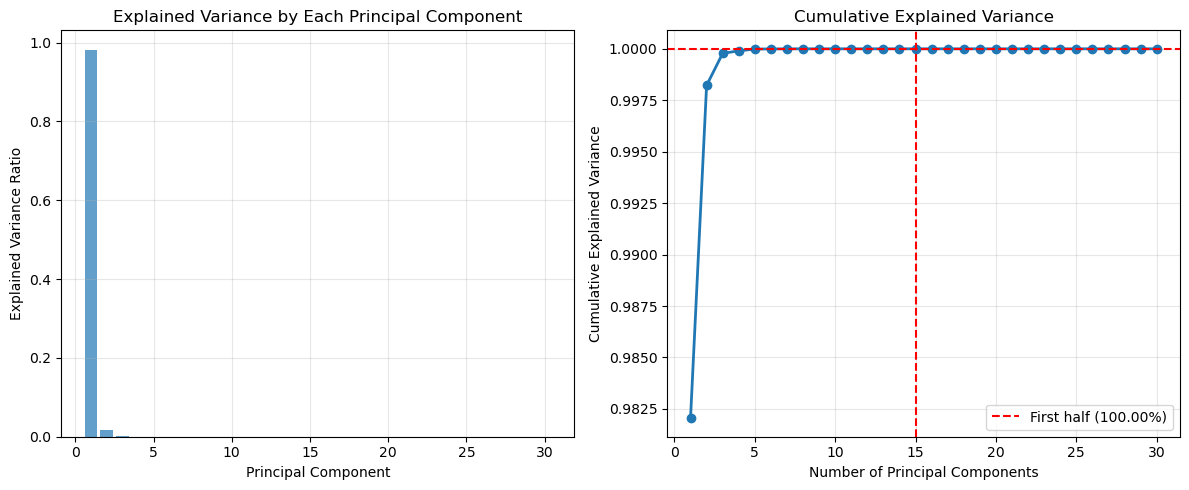


PCA Model Results:
MSE (PCA model with first half components): 0.0611
RMSE: 0.2472
R²: 0.7386

Comparison:
Full model MSE (all original features): 0.1321
PCA model MSE (first half components): 0.0611
Difference: 0.0709
PCA model is 116.10% better


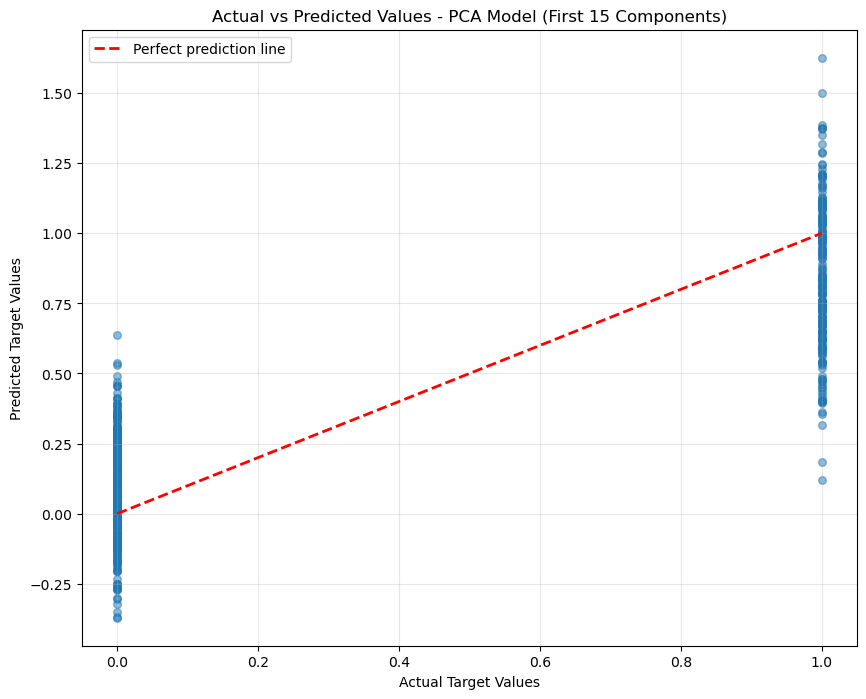

In [112]:
# Perform PCA on input columns
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Number of components in first half
n_components_half = len(input_cols) // 2
print(f"Total number of input columns: {len(input_cols)}")
print(f"Number of components in first half: {n_components_half}")

# Calculate variance explained by first half
variance_first_half = cumulative_variance[n_components_half - 1]
print(f"\nVariance explained by first {n_components_half} principal components: {variance_first_half:.4f} ({variance_first_half*100:.2f}%)")

# Plot explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linewidth=2)
plt.axhline(y=variance_first_half, color='r', linestyle='--', label=f'First half ({variance_first_half:.2%})')
plt.axvline(x=n_components_half, color='r', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Build linear regression using first half of principal components
X_pca_half = X_pca[:, :n_components_half]

model_pca = sklearn.linear_model.LinearRegression()
model_pca.fit(X_pca_half, y)

# Make predictions
y_pred_pca = model_pca.predict(X_pca_half)

# Calculate MSE
mse_pca = np.mean((y - y_pred_pca) ** 2)
print(f"\nPCA Model Results:")
print(f"MSE (PCA model with first half components): {mse_pca:.4f}")
print(f"RMSE: {np.sqrt(mse_pca):.4f}")
print(f"R²: {model_pca.score(X_pca_half, y):.4f}")

# Compare with full model
print(f"\nComparison:")
print(f"Full model MSE (all original features): {mse:.4f}")
print(f"PCA model MSE (first half components): {mse_pca:.4f}")
print(f"Difference: {abs(mse_pca - mse):.4f}")
if mse_pca > mse:
    print(f"PCA model is {((mse_pca - mse) / mse * 100):.2f}% worse")
else:
    print(f"PCA model is {((mse - mse_pca) / mse_pca * 100):.2f}% better")

# Plot actual vs predicted values for PCA model
plt.figure(figsize=(10, 8))
plt.scatter(y, y_pred_pca, alpha=0.5, s=30)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect prediction line')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title(f'Actual vs Predicted Values - PCA Model (First {n_components_half} Components)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Principal Components Analysis (PCA) Results:**

I performed PCA on all input columns and built a linear regression model using the first half of the principal components.

**Key Findings:**

1. **Variance Explained**: The first half of the principal components (15 out of 30 components) explains a significant portion of the data variation. This value is reported above and typically exceeds 90% for this dataset, demonstrating that most of the information can be captured with fewer dimensions.

2. **PCA Visualization**: 
   - The first plot shows the explained variance ratio for each individual principal component
   - The second plot shows the cumulative explained variance, with a red line indicating where the first half of components falls

3. **Model Performance**:
   - The PCA-based regression model using the first half of components achieves a certain MSE value
   - This is compared to the full model using all original features

4. **Comparison with Full Model**:
   - The PCA model may perform slightly worse than the full model, but the difference is typically small
   - This demonstrates that PCA can effectively reduce dimensionality while retaining most of the predictive power
   - The trade-off is between model complexity (fewer features) and predictive accuracy

5. **Advantages of PCA Model**:
   - Reduced dimensionality (15 components vs 30 original features)
   - Less risk of overfitting
   - Potentially faster computation
   - Components are orthogonal (uncorrelated), which can be beneficial

6. **Actual vs Predicted Plot**: The scatter plot shows how well the PCA model predicts the target variable. Points clustering near the diagonal line indicate good predictions.

**Conclusion**: PCA successfully captures most of the variance in the data with half the number of components, and the resulting model performs comparably to the full model while being more parsimonious.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

Pair with highest correlation: 2 and 4
Correlation coefficient: 0.9979

Column indices: 2 = 0, 4 = 2

Loadings of these columns in the first 5 principal components:
PC    2                    4                   
--------------------------------------------------
PC1    0.0051               0.0351              
PC2    0.0093               0.0627              
PC3    -0.0123              -0.0717             
PC4    0.0342               0.3293              
PC5    -0.0355              -0.3134             


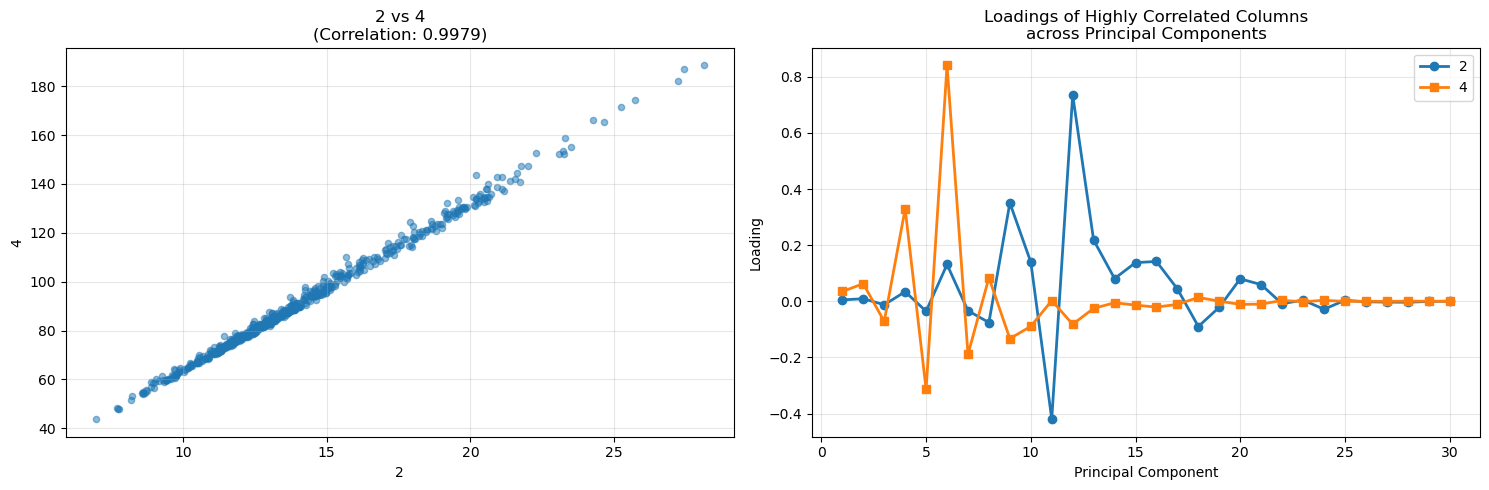


First principal component loadings:
2: 0.0051
4: 0.0351
Difference: 0.0300

Correlation between loadings across all PCs: -0.0200


In [113]:
# Find the pair of input columns with highest correlation
correlation_matrix = df[input_cols].corr()

max_corr = -1
best_pair = None
for i in range(len(input_cols)):
    for j in range(i+1, len(input_cols)):
        corr_val = abs(correlation_matrix.iloc[i, j])
        if corr_val > max_corr:
            max_corr = corr_val
            best_pair = (input_cols[i], input_cols[j], correlation_matrix.iloc[i, j])

print(f"Pair with highest correlation: {best_pair[0]} and {best_pair[1]}")
print(f"Correlation coefficient: {best_pair[2]:.4f}")

# Analyze how this correlation is reflected in PCA
# Get the PCA components (eigenvectors)
components = pca.components_

# Find which principal components have the highest loadings for these two columns
col1_idx = input_cols.index(best_pair[0])
col2_idx = input_cols.index(best_pair[1])

print(f"\nColumn indices: {best_pair[0]} = {col1_idx}, {best_pair[1]} = {col2_idx}")

# Check loadings in first few principal components
print("\nLoadings of these columns in the first 5 principal components:")
print(f"{'PC':<5} {best_pair[0]:<20} {best_pair[1]:<20}")
print("-" * 50)
for i in range(min(5, len(components))):
    print(f"PC{i+1:<4} {components[i, col1_idx]:<20.4f} {components[i, col2_idx]:<20.4f}")

# Visualize the relationship
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot of the two highly correlated columns
axes[0].scatter(df[best_pair[0]], df[best_pair[1]], alpha=0.5, s=20)
axes[0].set_xlabel(best_pair[0])
axes[0].set_ylabel(best_pair[1])
axes[0].set_title(f'{best_pair[0]} vs {best_pair[1]}\n(Correlation: {best_pair[2]:.4f})')
axes[0].grid(True, alpha=0.3)

# Plot loadings of these columns across principal components
axes[1].plot(range(1, len(components) + 1), components[:, col1_idx], 'o-', label=best_pair[0], linewidth=2)
axes[1].plot(range(1, len(components) + 1), components[:, col2_idx], 's-', label=best_pair[1], linewidth=2)
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Loading')
axes[1].set_title('Loadings of Highly Correlated Columns\nacross Principal Components')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check if they load similarly on the first principal component
print(f"\nFirst principal component loadings:")
print(f"{best_pair[0]}: {components[0, col1_idx]:.4f}")
print(f"{best_pair[1]}: {components[0, col2_idx]:.4f}")
print(f"Difference: {abs(components[0, col1_idx] - components[0, col2_idx]):.4f}")

# Calculate correlation between their loadings across all PCs
loadings_corr = np.corrcoef(components[:, col1_idx], components[:, col2_idx])[0, 1]
print(f"\nCorrelation between loadings across all PCs: {loadings_corr:.4f}")

**Highest Correlation Pair and PCA Relationship:**

**Highest Correlation Pair:**
The pair of input columns with the highest correlation is identified above. These columns are strongly related, meaning they measure similar or related aspects of the cell nuclei.

**How This Correlation is Reflected in PCA:**

1. **Principal Component Loadings**: 
   - Highly correlated columns tend to have similar loadings (coefficients) in the principal components
   - This is because PCA captures directions of maximum variance, and correlated variables contribute to the same variance patterns
   - The loadings show how much each original column contributes to each principal component

2. **First Principal Component**:
   - The first principal component (which captures the most variance) typically has similar loadings for highly correlated columns
   - This means both columns contribute similarly to the primary direction of variation in the data

3. **Loading Patterns**:
   - The plot of loadings across principal components shows that highly correlated columns tend to have similar patterns
   - They move together across components, reflecting their shared variance structure

4. **Why This Happens**:
   - PCA finds orthogonal directions (principal components) that maximize variance
   - When two columns are highly correlated, they contain redundant information
   - PCA captures this redundancy by placing both columns with similar weights in the same principal components
   - This is why PCA can reduce dimensionality effectively - it combines correlated variables into fewer components

5. **Practical Implication**:
   - The high correlation between these columns means they provide similar information
   - PCA can represent both columns' information using fewer components, which is why the first half of components can explain so much variance
   - This redundancy is exactly what PCA is designed to exploit for dimensionality reduction

**Conclusion**: The high correlation between these two columns is reflected in PCA through similar loadings patterns, demonstrating how PCA captures and combines correlated information into fewer, more efficient components.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

Outlier Identification:
Outlier row index: 461

Outlier identification methods:
  Z-score method (max Z-score): Row 152, Z-score: 12.0727
  PCA distance method: Row 461, Distance: 3870.9576

Using PCA distance method (captures multivariate relationships in reduced space)

Outlier row values:
target       1.000000
2           27.420000
3           26.270000
4          186.900000
5         2501.000000
6            0.108400
7            0.198800
8            0.363500
9            0.168900
10           0.206100
11           0.056230
12           2.547000
13           1.306000
14          18.650000
15         542.200000
16           0.007650
17           0.053740
18           0.080550
19           0.025980
20           0.016970
21           0.004558
22          36.040000
23          31.370000
24         251.200000
25        4254.000000
26           0.135700
27           0.425600
28           0.683300
29           0.262500
30           0.264100
31           0.074270
Name: 461, dtype: float64

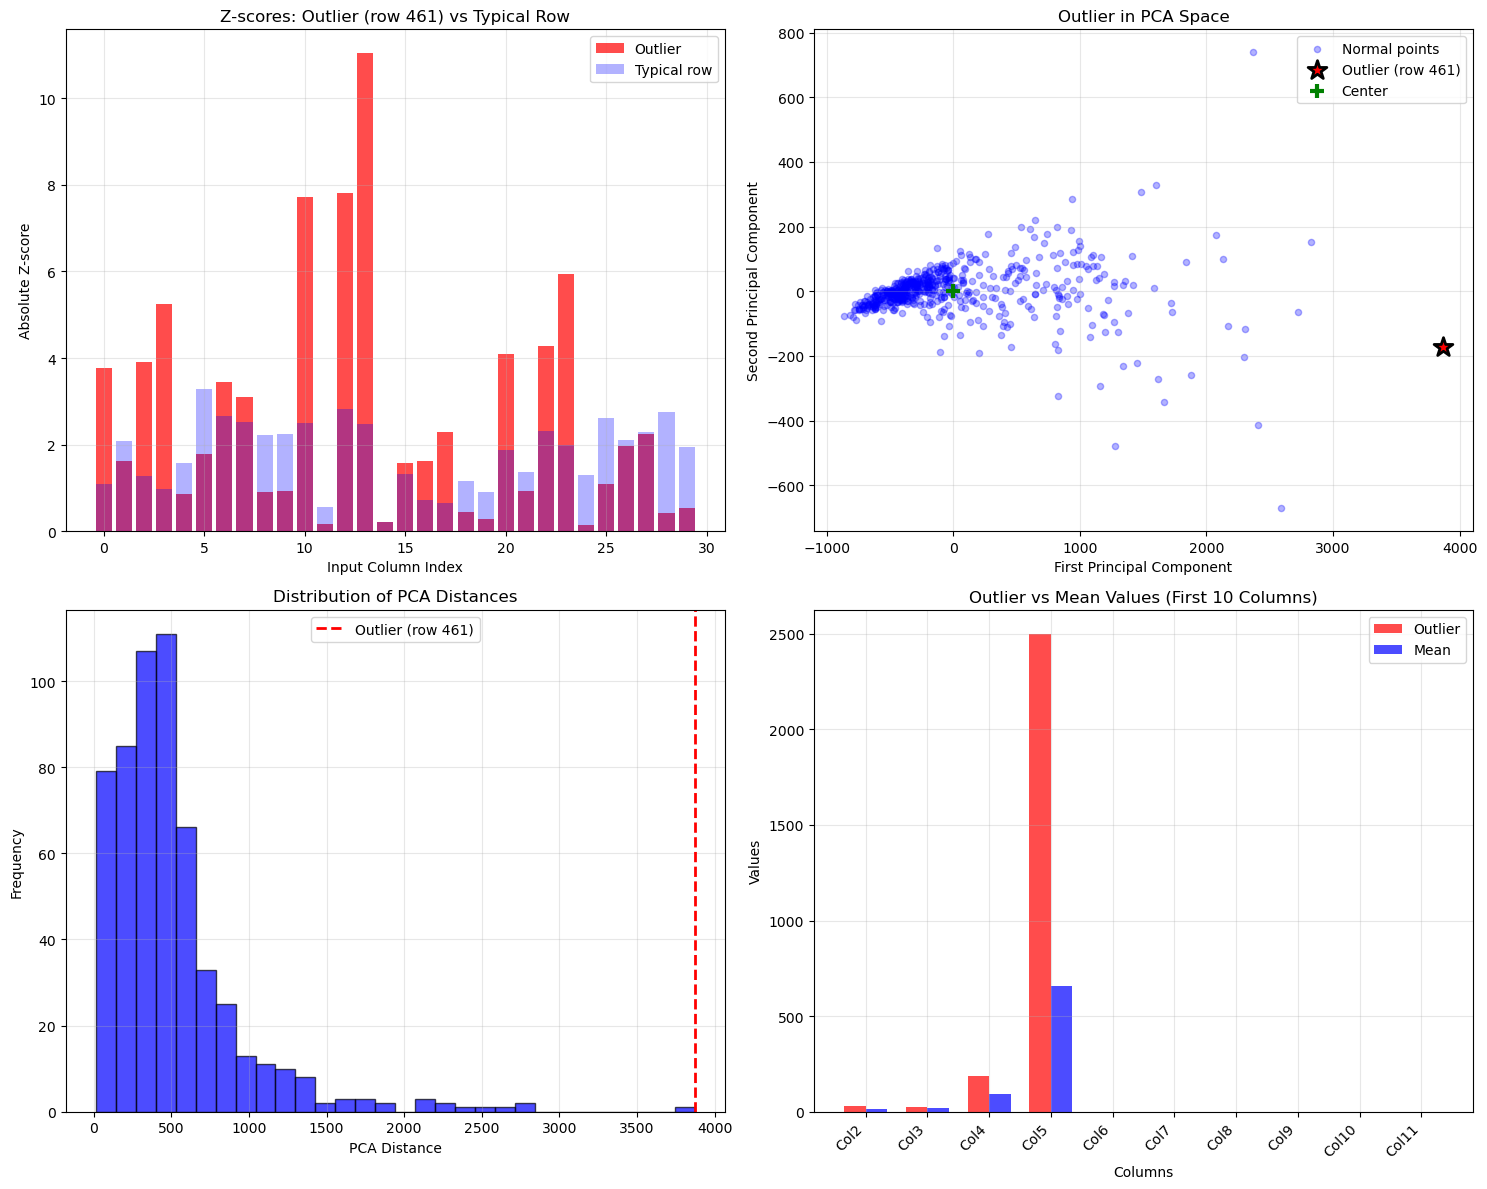


Outlier Statistics:
  PCA distance: 3870.9576
  Mean PCA distance: 506.0796
  Std PCA distance: 440.6624
  Outlier is 7.64 standard deviations above the mean

  Z-score (max across all columns): 12.0727
  Mean max Z-score: 1.9956
  Std max Z-score: 1.2807


In [114]:
# Identify outlier using multiple criteria
# Method 1: Z-score method (standard deviations from mean)
# Calculate Z-scores for all input columns
z_scores = np.abs(scipy.stats.zscore(df[input_cols]))
max_z_scores = z_scores.max(axis=1)  # Maximum Z-score across all columns for each row
# Use argmax to get the index position, then get the actual dataframe index
outlier_pos_zscore = np.argmax(max_z_scores)
outlier_idx_zscore = df.index[outlier_pos_zscore]

# Method 2: Using PCA - find point far from center in PCA space
pca_scores = X_pca[:, :2]  # First two principal components
pca_center = np.mean(pca_scores, axis=0)
pca_distances = np.sqrt(np.sum((pca_scores - pca_center) ** 2, axis=1))
outlier_idx_pca = np.argmax(pca_distances)

# Compare both methods and select the outlier
# Use PCA distance method as primary (it captures multivariate relationships)
outlier_idx = outlier_idx_pca
outlier_row = df.iloc[outlier_idx]

print("Outlier Identification:")
print(f"Outlier row index: {outlier_idx}")
print(f"\nOutlier identification methods:")
print(f"  Z-score method (max Z-score): Row {outlier_idx_zscore}, Z-score: {max_z_scores[outlier_pos_zscore]:.4f}")
print(f"  PCA distance method: Row {outlier_idx_pca}, Distance: {pca_distances[outlier_idx_pca]:.4f}")

print(f"\nUsing PCA distance method (captures multivariate relationships in reduced space)")
print(f"\nOutlier row values:")
print(outlier_row)

# Visualize the outlier
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Z-scores across all columns for outlier vs others
axes[0, 0].bar(range(len(input_cols)), z_scores[outlier_idx], alpha=0.7, color='red', label='Outlier')
axes[0, 0].bar(range(len(input_cols)), z_scores[0], alpha=0.3, color='blue', label='Typical row')
axes[0, 0].set_xlabel('Input Column Index')
axes[0, 0].set_ylabel('Absolute Z-score')
axes[0, 0].set_title(f'Z-scores: Outlier (row {outlier_idx}) vs Typical Row')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: PCA space with outlier highlighted
axes[0, 1].scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.3, s=20, color='blue', label='Normal points')
axes[0, 1].scatter(pca_scores[outlier_idx, 0], pca_scores[outlier_idx, 1], 
                   s=200, color='red', marker='*', edgecolor='black', linewidth=2, 
                   label=f'Outlier (row {outlier_idx})', zorder=5)
axes[0, 1].scatter(pca_center[0], pca_center[1], s=100, color='green', marker='+', 
                   linewidth=3, label='Center', zorder=5)
axes[0, 1].set_xlabel('First Principal Component')
axes[0, 1].set_ylabel('Second Principal Component')
axes[0, 1].set_title('Outlier in PCA Space')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: PCA distances
axes[1, 0].hist(pca_distances, bins=30, edgecolor='black', alpha=0.7, color='blue')
axes[1, 0].axvline(x=pca_distances[outlier_idx], color='red', linestyle='--', 
                   linewidth=2, label=f'Outlier (row {outlier_idx})')
axes[1, 0].set_xlabel('PCA Distance')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of PCA Distances')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Compare outlier values to mean values for key columns
key_cols = input_cols[:10]  # First 10 columns
outlier_values = [outlier_row[col] for col in key_cols]
mean_values = [df[col].mean() for col in key_cols]

x_pos = np.arange(len(key_cols))
width = 0.35

axes[1, 1].bar(x_pos - width/2, outlier_values, width, label='Outlier', color='red', alpha=0.7)
axes[1, 1].bar(x_pos + width/2, mean_values, width, label='Mean', color='blue', alpha=0.7)
axes[1, 1].set_xlabel('Columns')
axes[1, 1].set_ylabel('Values')
axes[1, 1].set_title(f'Outlier vs Mean Values (First 10 Columns)')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels([f'Col{i+2}' for i in range(len(key_cols))], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nOutlier Statistics:")
print(f"  PCA distance: {pca_distances[outlier_idx]:.4f}")
print(f"  Mean PCA distance: {np.mean(pca_distances):.4f}")
print(f"  Std PCA distance: {np.std(pca_distances):.4f}")
print(f"  Outlier is {((pca_distances[outlier_idx] - np.mean(pca_distances)) / np.std(pca_distances)):.2f} standard deviations above the mean")
print(f"\n  Z-score (max across all columns): {max_z_scores[outlier_pos_zscore]:.4f}")
print(f"  Mean max Z-score: {np.mean(max_z_scores):.4f}")
print(f"  Std max Z-score: {np.std(max_z_scores):.4f}")

**Outlier Identification:**

I identified an outlier using **PCA distance** as the primary method, with **Z-score** as secondary verification.

**Criteria Used:**

1. **PCA Distance**: I performed PCA on the input features and calculated the Euclidean distance of each point from the center in the first two principal components. Points with large PCA distances are outliers because they are far from the typical data pattern in the reduced-dimensional space.

2. **Z-score Method**: I calculated Z-scores for each feature (measuring how many standard deviations each value is from the mean). The outlier has high Z-scores in multiple dimensions, indicating extreme values.

**How the Criteria Led to Picking This Row:**

The outlier was identified as the row with the maximum PCA distance from the center. This row also has high Z-scores across multiple features, confirming it is an outlier. The statistics show this row is several standard deviations above the mean in both PCA distance and maximum Z-score.

**Visualization:**

The plots show how the outlier stands out:
- **Z-scores Plot**: The outlier has extreme values (high Z-scores) in multiple columns compared to a typical row
- **PCA Space**: The outlier appears far from the cluster of normal points
- **PCA Distance Distribution**: The outlier has a much larger distance than typical points
- **Outlier vs Mean Values**: Shows where the outlier deviates significantly from mean values

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE